In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd
import warnings
warnings.filterwarnings('ignore')

# 热力与订单的数据概况

In [2]:
grid_heatmap = pd.read_csv('data/EVDATA热力+订单/车辆热力分析0712.csv')
Chage_Grid = pd.read_csv('data/EVDATA热力+订单/订单量0712.csv')
Chage_Grid['总充电量'] = Chage_Grid['总充电量'].str.replace(',','').astype(float)
grid_heatmap['hour'] = grid_heatmap['统计时刻'].str.split(' ').str[1].astype(int)

In [3]:
# 生成栅格范围
def generate_grid(grid_heatmap):
    grid_heatmap['lon'] = grid_heatmap['经纬度编号'].str.split('-').str[0].astype(float)
    grid_heatmap['lat'] = grid_heatmap['经纬度编号'].str.split('-').str[1].astype(float)
    params = {'slon': 120,
    'slat': 30,
    'deltalon': 0.01,
    'deltalat': 0.01,
    'theta': 0,
    'method': 'rect',
    'gridsize': 500}
    grid_heatmap['LONCOL'],grid_heatmap['LATCOL'] = tbd.GPS_to_grid(grid_heatmap['lon'], grid_heatmap['lat'],params)
    grid_heatmap['geometry'] = tbd.grid_to_polygon([grid_heatmap['LONCOL'], grid_heatmap['LATCOL']],params)
    grid_heatmap = gpd.GeoDataFrame(grid_heatmap, geometry='geometry')
    return grid_heatmap
grid_heatmap = generate_grid(grid_heatmap)
Chage_Grid = generate_grid(Chage_Grid)

In [4]:
colname = '充电次数'
vmax = 100
for hour in Chage_Grid['充电时段'].drop_duplicates():
    import seaborn as sns
    import matplotlib.pyplot as plt
    # 中文
    plt.rcParams['font.sans-serif'] = ['SimHei']
    plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(1, (10, 10), dpi=300)
    ax = plt.subplot(111)

    plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
    bounds = (121.335, 31.115, 121.642, 31.385)
    tbd.plot_map(plt,bounds, zoom=13,style=11)

    cax = plt.axes([0.92, 0.3, 0.03, 0.25])
    plt.title(colname,fontsize=12)
    plt.sca(ax)

    Chage_Grid[Chage_Grid['充电时段']==hour].plot(colname,legend=True,cax = cax,figsize=(10,10),ax = ax,vmax = vmax, cmap='YlOrRd')

    tbd.plotscale(ax, bounds=bounds, textsize=10, compasssize=0.6, accuracy=1000, rect=[0.08, -0.05], zorder=10)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=0)
    plt.title(f'{colname} - 2023-07-12 {hour}时',fontsize=12)
    plt.axis('off')
    plt.savefig(f'data/EVDATA热力+订单/figs/{colname} - 2023-07-12 {hour}时.png',dpi=300)
    plt.clf()

In [ ]:
hour = 8
colname = '车辆数'
vmax = 500
for hour in grid_heatmap['hour'].drop_duplicates():
    import seaborn as sns
    import matplotlib.pyplot as plt
    # 中文
    #plt.rcParams['font.sans-serif'] = ['SimHei']
    #plt.rcParams['axes.unicode_minus'] = False
    fig = plt.figure(1, (10, 10), dpi=300)
    ax = plt.subplot(111)

    plt.subplots_adjust(left=0.19,right=0.98,top=0.9,bottom=0.19)
    bounds = (121.335, 31.115, 121.642, 31.385)
    tbd.plot_map(plt,bounds, zoom=13,style=11)

    cax = plt.axes([0.92, 0.3, 0.03, 0.25])
    plt.title(colname,fontsize=12)
    plt.sca(ax)

    grid_heatmap[grid_heatmap['hour']==hour].plot(colname,legend=True,figsize=(10,10),vmax = 500,ax = ax,cax = cax, cmap='YlOrRd')

    tbd.plotscale(ax, bounds=bounds, textsize=10, compasssize=0.6, accuracy=1000, rect=[0.08, -0.05], zorder=10)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, linestyle='--', color='lightgray', zorder=0)
    plt.title(f'{colname} - 2023-07-12 {hour}时',fontsize=12)
    plt.axis('off')
    plt.savefig(f'data/EVDATA热力+订单/figs/{colname} - 2023-07-12 {hour}时.png',dpi=300)
    plt.clf()

<Figure size 3000x3000 with 0 Axes>

In [26]:
Chage_Grid[Chage_Grid['hour']==22].plot('charge_orders',legend=True,figsize=(10,10))



<AxesSubplot:>

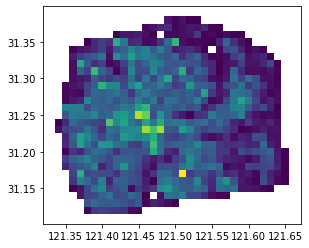

In [34]:
grid_heatmap[grid_heatmap['统计时刻']=='2023-07-12 00'].plot('车辆数')


In [25]:
stations = gpd.read_file('data/充电桩/上海充电桩_中促盟_处理后.geojson')


params = {'slon': 120,
'slat': 30,
'deltalon': 0.01,
'deltalat': 0.01,
'theta': 0,
'method': 'rect',
'gridsize': 500}
stations['LONCOL'],stations['LATCOL'] = tbd.GPS_to_grid(stations['经度'], stations['纬度'],params)
stations_capacity =  stations.groupby(['LONCOL','LATCOL'])[['交流桩数量','直流桩数量']].sum().reset_index()
stations_capacity['geometry'] = tbd.grid_to_polygon([stations_capacity['LONCOL'], stations_capacity['LATCOL']],params)

grid_heatmap = pd.read_csv('data/EVDATA热力+订单/15grid.csv')
def generate_grid(grid_heatmap):
    params = {'slon': 120,
    'slat': 30,
    'deltalon': 0.01,
    'deltalat': 0.01,
    'theta': 0,
    'method': 'rect',
    'gridsize': 500}
    grid_heatmap['LONCOL'],grid_heatmap['LATCOL'] = tbd.GPS_to_grid(grid_heatmap['lon'], grid_heatmap['lat'],params)
    grid_heatmap['geometry'] = tbd.grid_to_polygon([grid_heatmap['LONCOL'], grid_heatmap['LATCOL']],params)
    grid_heatmap = gpd.GeoDataFrame(grid_heatmap, geometry='geometry')
    return grid_heatmap
grid_heatmap = generate_grid(grid_heatmap)
grid = grid_heatmap[['LONCOL','LATCOL']].drop_duplicates()
grid['geometry'] = tbd.grid_to_polygon([grid['LONCOL'], grid['LATCOL']],params)
grid = gpd.GeoDataFrame(grid, geometry='geometry')
grid.to_file('data/gis/grid.geojson',driver='GeoJSON')

,统计时刻,经纬度编号,车辆数,BEV车辆数,PHEV车辆数,lon,lat,LONCOL,LATCOL
0,2023-07-12 00,121.35-31.23,64,51,13,121.35,31.23,135,123
1,2023-07-12 11,121.45-31.2,397,283,114,121.45,31.20,145,120
2,2023-07-12 22,121.43-31.32,54,33,21,121.43,31.32,143,132
3,2023-07-12 19,121.52-31.24,245,182,63,121.52,31.24,152,124
4,2023-07-12 11,121.54-31.27,97,60,37,121.54,31.27,154,127
...,...,...,...,...,...,...,...,...,...
5545,2023-07-12 19,121.62-31.34,2,1,1,121.62,31.34,162,134
5546,2023-07-12 14,121.34-31.22,1,0,1,121.34,31.22,134,122
5547,2023-07-12 08,121.41-31.25,120,67,53,121.41,31.25,141,125
5548,2023-07-12 21,121.61-31.29,65,49,16,121.61,31.29,161,129
